In [1]:
# Warmup 0
import sqlite3
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 15

In [2]:
# Warmup 1: Write a function that converts any Fehrenheit temp to Celcius
# Note: The final exam will have about 25% material from earlier in the course
# C = (5/9) * (f-32)

def f_to_c(f):
    return (5/9) * (f-32)


# test it by making several calls
print(f_to_c(212))
print(f_to_c(32))
print(f_to_c(67))

100.0
0.0
19.444444444444446


# Plotting Applications

**Learning Objectives**

- Make a line plot on a series or on a DataFrame
- Apply features of line plots and bar plots to visualize results of data investigations
- Clean Series data by dropping NaN values and by converting to int
- Make a stacked bar plot

## Line plots
- `SERIES.plot.line()`
- `DATAFRAME.plot.line()`    each column in the data frame becomes a line in the plot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html

<AxesSubplot:>

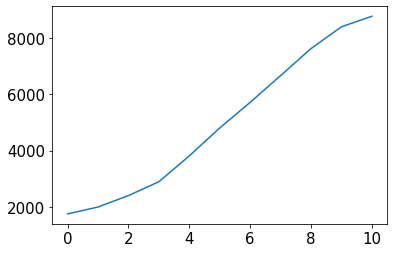

In [3]:
# when you make a series from a list, the default indices 0, 1, 2, ...
s = Series([1758, 2002, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764]) # y values
s.plot.line()

<AxesSubplot:>

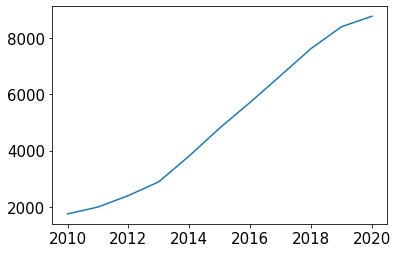

In [4]:
# You can make a series from a list and add indices
s = Series([1758, 2002, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764], \
           index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
s.plot.line()

Text(0, 0.5, '# Craft Breweries')

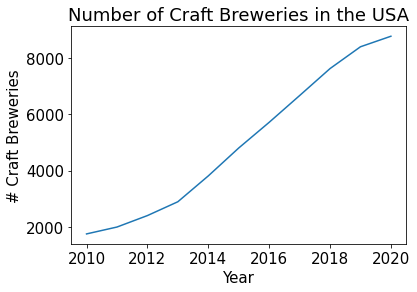

In [5]:
# We can save the AxesSubplot and "beautify" it like the other plots...
ax = s.plot.line()
ax.set_title("Number of Craft Breweries in the USA")
ax.set_xlabel("Year")
ax.set_ylabel("# Craft Breweries")

2010    1758
2012    2408
2013    2898
2014    3814
2015    4803
2016    5713
2017    6661
2018    7618
2019    8391
2020    8764
2011    2002
dtype: int64

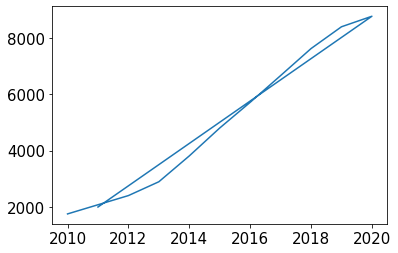

In [6]:
# Be careful! If the indices are out of order you get a mess
# pandas plots each (index, value) in the order given
s = Series([1758, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764, 2002], \
           index=[2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2011])
s.plot.line()
s

2010    1758
2011    2002
2012    2408
2013    2898
2014    3814
2015    4803
2016    5713
2017    6661
2018    7618
2019    8391
2020    8764
dtype: int64

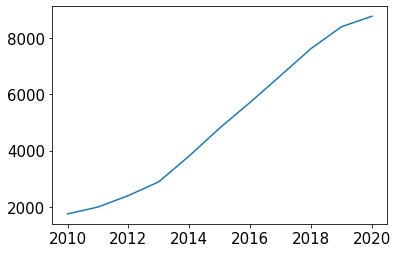

In [7]:
# you can fix this by calling sort_index()
s.sort_index().plot.line()
s.sort_index()

### Plotting lines from a DataFrame

In [8]:
# This DataFrame is made using a dict of lists
# City of Madison normal high and low (degrees F) by month
temp_df = DataFrame( 
    {
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]     }
)
temp_df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


### A Line Plot made from a DataFrame automatically plots all columns

The same is true for bar plots; we'll see this later.

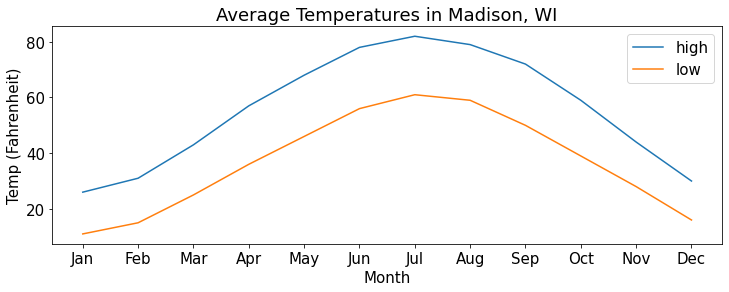

In [9]:
# You can also add ticks and ticklabels to a line plot

ax = temp_df.plot.line(figsize=(12, 4))
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticks(range(12))   # makes a range from 0 to 11
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# This gets rid of the weird output
None

Text(0, 0.5, 'Temp (Fahrenheit)')

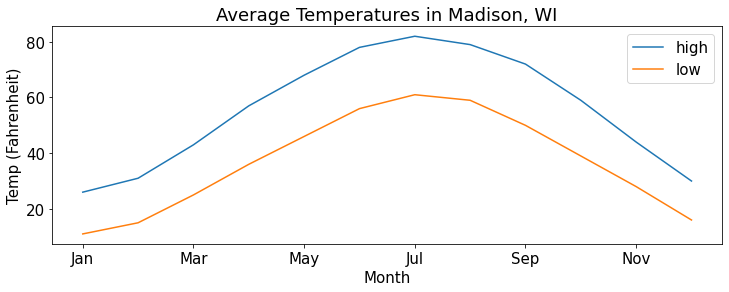

In [10]:
# ... Or explicitly pass the "x" and "y" parameters...
temp_df_with_month = DataFrame( 
    {
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]     }
)

ax = temp_df_with_month.plot.line(x="month", y=["high", "low"], figsize=(12, 4))
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")

### We can perform a calculation on an entire DataFrame
Let's change the entire DataFrame to Celcius

In [11]:
# call the function on the dataframe
celcius_df = f_to_c(temp_df)
celcius_df

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778
5,25.555556,13.333333
6,27.777778,16.111111
7,26.111111,15.000000
8,22.222222,10.000000
9,15.000000,3.888889


In [12]:
# here is one way to add a horizontal line to our line plots
celcius_df["freezing"] = 0
celcius_df

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


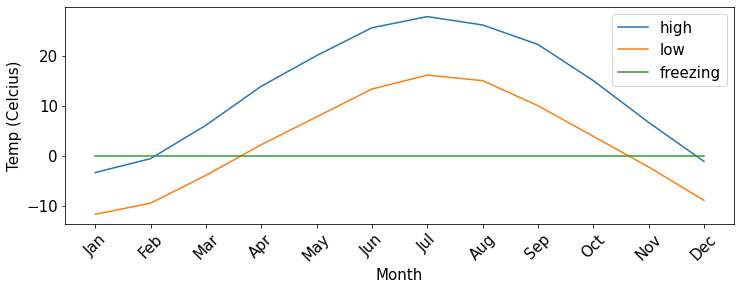

In [13]:
# this plots each column as lines
# with rotation for the tick labels
ax = celcius_df.plot.line(y=["high", "low", "freezing"], figsize = (12,4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticks(range(12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
None

### Bar Plot Example w/ Fire Hydrants

- General review of Pandas
- Some new Bar Plot options


In [20]:
hdf = pd.read_csv("Fire_Hydrants.csv")
hdf.tail()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10108,-89.518896,43.062062,287129,WUJAG,2018-08-20T18:54:01.000Z,WUJAG,2018-08-20T19:27:16.000Z,-2355-4057,FASB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN


In [21]:
# grab just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [22]:
# make a series called counts_series which stores the value counts of the "nozzle_color"
color_counts = hdf["nozzle_color"].value_counts()
color_counts # what type is this? 

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
GREEN        1
white        1
C            1
ORANGE       1
Name: nozzle_color, dtype: int64

In [23]:
# TODO: Clean the data ......use str.upper()

color_counts= hdf["nozzle_color"].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0, 0.5, 'Fire hydrant count')

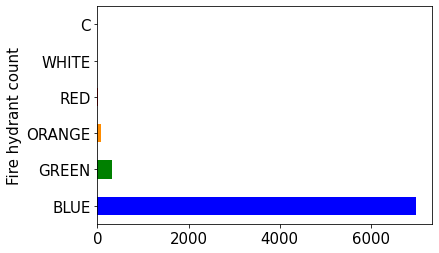

In [24]:
# make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "c", "0.5"]
ax = color_counts.plot.barh(color=["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

In [25]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = hdf["Style"].str.upper().value_counts()
style_counts

PACER                      3620
M-3                        1251
MUELLER                    1243
WB-59                       664
K-11                        351
K-81                        162
W-59                        151
CLOW 2500                   123
CLOW MEDALLION               70
CLOW                         50
CENTURIAN                    35
EDDY                         27
MUELLER 90                   13
MUELLER 86                   13
MUELLER SUPER CENTURIAN      12
MUELLER 92                   12
MUELLER 93                   11
MUELLER 91                    9
MUELLER 89                    9
MUELLER CENTURIAN             9
MUELLER 85                    8
MUELLER 87                    7
MUELLER 84                    6
M-2                           6
SUPER CENTURIAN               6
M-1                           5
MUELLER 83                    4
MEDALLION                     4
PACER 1996                    3
SUPER CENTURION               3
K-10                          3
PACER 90

<AxesSubplot:>

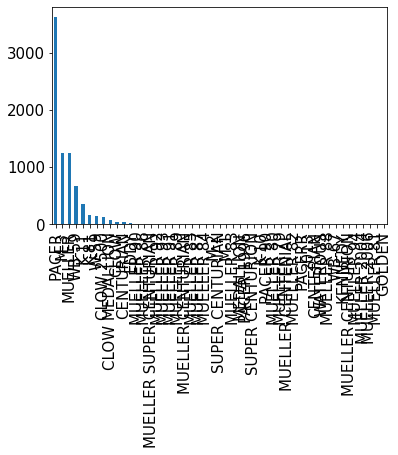

In [26]:
style_counts.plot.bar()

In [27]:
# Grab the top 12 
top12 = style_counts.iloc[:12]

# and them add an index to our Series for the sum of all the "other" for 
top12["other"] = style_counts.iloc[12:].sum()

Text(0.5, 0, 'Hydrant Type')

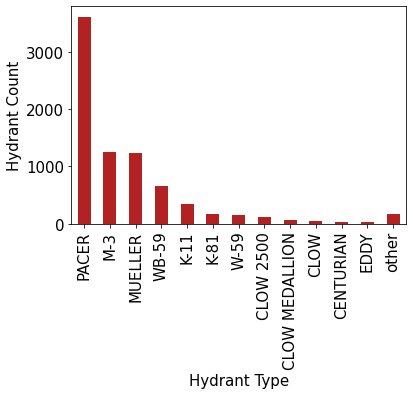

In [28]:
# Plot the results
ax = top12.plot.bar(color="firebrick")
ax.set_ylabel("Hydrant Count")
ax.set_xlabel("Hydrant Type")

### Plot the year manufactured for the Pacer Style as opposed to other styles

In [29]:
# Let's get the year manufactured for all of the "Pacer" hydrants.

pacer_years = hdf[hdf["Style"] == "Pacer"]["year_manufactured"]

# Note: We can do this either way
# pacer_years = hdf["year_manufactured"][hdf["Style"] == "Pacer"]

pacer_years


0        1996.0
1        1995.0
2        1996.0
3        1995.0
4        1996.0
          ...  
10050    2017.0
10051    2017.0
10052    2017.0
10053    2017.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [30]:
# then do the same for all the other data
other_years = hdf["year_manufactured"][hdf["Style"] != "Pacer"]
other_years

18       1987.0
22       1996.0
23       1996.0
71       1987.0
72       1987.0
          ...  
10104    2018.0
10105    2017.0
10106    2000.0
10107    2017.0
10108       NaN
Name: year_manufactured, Length: 6651, dtype: float64

In [31]:
# Round each year down to the start of the decade.
# e.g. 1987 --> 1980,   2003 --> 2000
pacer_decades = (pacer_years // 10 * 10)
pacer_decades

0        1990.0
1        1990.0
2        1990.0
3        1990.0
4        1990.0
          ...  
10050    2010.0
10051    2010.0
10052    2010.0
10053    2010.0
10054       NaN
Name: year_manufactured, Length: 3458, dtype: float64

In [32]:
# Drop the NaN values, convert to int, and do value counts
pacer_decades = pacer_decades.dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [33]:
# Do the same thing for other_years. Save to a variable called "other_decades"
other_decades = (other_years // 10 * 10).dropna()
other_decades = other_decades.astype(int).value_counts()
other_decades

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

In [34]:
# Build a DataFrame from a dictionary of key, Series
plot_df = DataFrame({
    "pacer": pacer_decades,
    "other": other_decades,
})
plot_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


Text(0, 0.5, 'Hydrant Count')

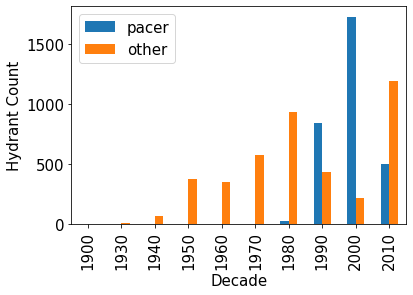

In [35]:
# make a bar plot

ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

Text(0, 0.5, 'Hydrant Count')

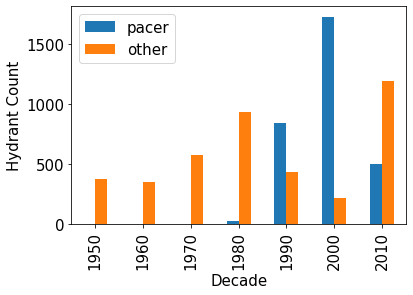

In [36]:
# Ignore data from before 1950 using boolean indexing.
ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

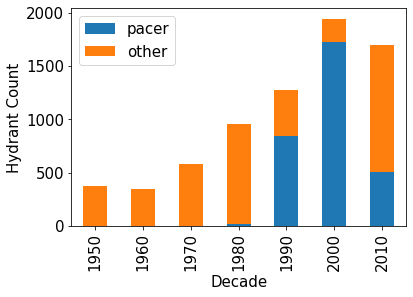

In [37]:
# Make a Stacked Bar Chart!
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None